<h1>FIFA22 - Analisis Exploratorio </h1>

FIFA 22 es un videojuego simulador de fútbol, creado por EA Sports especificamente por sus filiales

EA Rumania y EA Vancouver para diferentes consolas como PS4, PS5, XBOX Series X/S, Xbox One, PC, etc.

El analisis se basará en comprender las caracteristicas de los jugadores en diferentes posiciones, para poder conocert

cosas como; mejores jugadores, jugadores mejor pagados, mejores arqueros, mejores jugadores juveniles, poder

entender si existe relacion entre la edad y la calificacion general de los jugadores, etc.

El dataset utilizado consta de 19260 registros y varias características como el nombre del jugador, su potencial, calificación general, edad, altura,

peso, costo, salario, etc.

- El salario y el costo del jugador se encunetran en Euros

Aqui pueden ver el dataset **[Click Aqui](https://www.kaggle.com/cashncarry/fifa-22-complete-player-dataset)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
players = pd.read_csv('./fifa22-cleandata.csv')

In [3]:
players.head(20)

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Positions,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,Argentina,93,93,"RW,ST,CF",...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,Poland,92,92,ST,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,Portugal,91,91,"ST,LW",...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,France,91,95,"ST,LW",...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,Slovenia,91,93,GK,...,38,41,38,35,39,35,35,36,35,92
5,192985,K. De Bruyne,Kevin De Bruyne,30,181,70,Belgium,91,91,"CM,CAM",...,91,91,91,82,83,82,78,72,78,24
6,190871,Neymar Jr,Neymar da Silva Santos Jr.,29,175,68,Brazil,91,91,"LW,CAM",...,91,85,91,70,66,70,65,53,65,23
7,215914,N. Kanté,N'Golo Kanté,30,168,70,France,90,90,"CDM,CM",...,82,85,82,88,90,88,88,87,88,23
8,202126,H. Kane,Harry Kane,27,188,89,United Kingdom,90,90,ST,...,87,85,87,70,71,70,67,64,67,23
9,192448,M. ter Stegen,Marc-André ter Stegen,29,187,85,Germany,90,92,GK,...,42,48,42,36,44,36,34,36,34,91


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19260 non-null  int64  
 1   Name              19260 non-null  object 
 2   FullName          19260 non-null  object 
 3   Age               19260 non-null  int64  
 4   Height            19260 non-null  int64  
 5   Weight            19260 non-null  int64  
 6   Nationality       19260 non-null  object 
 7   Overall           19260 non-null  int64  
 8   Potential         19260 non-null  int64  
 9   Positions         19260 non-null  object 
 10  BestPosition      19260 non-null  object 
 11  Club              19260 non-null  object 
 12  ValueEUR          19260 non-null  int64  
 13  WageEUR           19260 non-null  int64  
 14  ReleaseClause     19260 non-null  int64  
 15  ContractUntil     19184 non-null  float64
 16  NationalTeam      19260 non-null  object

In [5]:
players.describe()

,ID,Age,Height,Weight,Overall,Potential,ValueEUR,WageEUR,ReleaseClause,ContractUntil,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
count,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,1.926000e+04,19184.000000,...,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000,19260.000000
mean,231682.741952,25.184683,181.305036,74.950779,65.815628,71.100104,2.857652e+06,8973.528037,5.066563e+06,2022.775334,...,58.364434,57.227207,58.364434,56.197040,55.771340,56.197040,55.539823,54.379595,55.539823,23.242939
std,26960.272515,4.737340,6.866151,7.066864,6.817297,6.092103,7.604532e+06,19415.497147,1.454190e+07,1.219224,...,13.989045,13.212152,13.989045,13.818416,13.856922,13.818416,14.063862,14.678658,14.063862,15.053823
min,41.000000,16.000000,155.000000,49.000000,48.000000,49.000000,0.000000e+00,0.000000,0.000000e+00,2021.000000,...,17.000000,17.000000,17.000000,17.000000,18.000000,17.000000,16.000000,18.000000,16.000000,10.000000
25%,214903.500000,21.000000,176.000000,70.000000,62.000000,67.000000,4.750000e+05,1000.000000,6.940000e+05,2022.000000,...,54.000000,52.000000,54.000000,51.000000,48.000000,51.000000,49.000000,44.000000,49.000000,17.000000
50%,236687.500000,25.000000,181.000000,75.000000,66.000000,71.000000,9.750000e+05,3000.000000,1.500000e+06,2022.000000,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,253607.500000,29.000000,186.000000,80.000000,70.000000,75.000000,2.000000e+06,8000.000000,3.400000e+06,2024.000000,...,67.000000,66.000000,67.000000,65.000000,66.000000,65.000000,65.000000,66.000000,65.000000,20.000000
max,264705.000000,54.000000,206.000000,110.000000,93.000000,95.000000,1.940000e+08,350000.000000,3.735000e+08,2031.000000,...,93.000000,91.000000,93.000000,88.000000,90.000000,88.000000,88.000000,89.000000,88.000000,92.000000


<h2>Preparación de Datos</h2>

<h3><strong> 1: Separación de jugadores por posicion </strong></h3>

In [6]:
goalkeeper_df = players[ players.BestPosition == 'GK' ]

In [7]:
defenders_df = players[ (players.BestPosition == 'CB') |
                       (players.BestPosition == 'LB') |
                       (players.BestPosition == 'RB') |
                       (players.BestPosition == 'RWB') |
                       (players.BestPosition == 'LWB') ]

In [8]:
midfielders_df =  players[ (players.BestPosition == 'CM') |
                       (players.BestPosition == 'CDM') |
                       (players.BestPosition == 'LM') |
                       (players.BestPosition == 'RM') |
                       (players.BestPosition == 'CAM') ]

In [9]:
forwards_df =  players[ (players.BestPosition == 'RW') |
                       (players.BestPosition == 'LW') |
                       (players.BestPosition == 'ST') |
                       (players.BestPosition == 'CF') ]

<h3><strong> 2: DataFrame sin agentes libres </strong></h3>

In [10]:
no_freeagent = players[players['Club'].ne('Free agent') ]
no_freeagent

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Positions,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,Argentina,93,93,"RW,ST,CF",...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,Poland,92,92,ST,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,Portugal,91,91,"ST,LW",...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,France,91,95,"ST,LW",...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,Slovenia,91,93,GK,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,262759,S. Black,Stephen Black,19,180,75,Republic of Ireland,48,62,CB,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,China PR,48,52,GK,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,China PR,48,55,CB,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,China PR,48,58,CB,...,38,37,38,46,45,46,49,50,49,17


<h3><strong> 3: Numero de Jugadores por Paises </strong></h3>

In [11]:
countries_players = players.Nationality.value_counts()
countries_players

United Kingdom    1718
Germany           1214
Spain             1091
France             987
Argentina          955
                  ... 
Tanzania             1
Fiji                 1
Bermuda              1
Malawi               1
Indonesia            1
Name: Nationality, Length: 163, dtype: int64

<h3><strong> 4: Definiendo la posicion general de los jugadores (Goalkepeer, Defender, Midfielder, Striker)  </strong></h3>

In [12]:
def position(bestposition):
    if bestposition == 'GK':
        return 'Goalkepeer'
    if bestposition == 'CB' or bestposition == 'LB' or bestposition == 'RB' or bestposition == 'LWB'or bestposition == 'RWB':
        return 'Defender'
    if bestposition == 'CM' or bestposition == 'C' or bestposition == 'LM' or bestposition == 'RM'or bestposition == 'CAM':
        return 'Midfielder'
    if bestposition == 'ST' or bestposition == 'CF' or bestposition == 'RW' or bestposition == 'LW':
        return 'Striker'

In [13]:
players['GeneralPosition'] = players['BestPosition'].apply( position )

<h2>Análisis General de FIFA 22</h2>

<h3><strong> 1: ¿Quién es el jugador mas longevo de FIFA 22? </strong></h3>

In [14]:
players.nlargest(1, 'Age')[['FullName', 'Age', 'Nationality', 'Club', 'BestPosition', 'Overall']]

,FullName,Age,Nationality,Club,BestPosition,Overall
16378,Kazuyoshi Miura,54,Japan,Yokohama FC,CF,59


<h4>Datos Curiosos</h4>

- Kazuyoshi Miura es el jugador profesional mas longevo en todo el mundo

- También posee un record por ser el jugador mas longevo en anotar un gol,
  este record se lo ganó en el año 2017 al superar a Stanley Matthews 

- En una entrevista dijo que jugaría al fútbol de forma profesional hasta los 75 años de edad

<h3><strong> 2: ¿Quién es el jugador mas joven de FIFA 22? </strong></h3>

In [15]:
players.nsmallest(1, 'Age')[['FullName', 'Age', 'Nationality', 'Club', 'BestPosition', 
                             'Overall', 'Potential']]

,FullName,Age,Nationality,Club,BestPosition,Overall,Potential
6524,Pablo Martín Páez Gavira,16,Spain,FC Barcelona,CAM,68,85


<h4>Datos Curiosos</h4>

- En agosto del 2021 cumplió 17 años

- Debutó con el FC Barcelona el 29 de agosto del 2021 contra el Getafe

- Es el jugador más joven en debutar con la selección española a sus 17 años de edad
en un partido de la Liga de Naciones


<h3><strong> 3: ¿Cuál es el promedio de edad de FIFA 22? </strong></h3>

In [16]:
print( f'El promedio de edad de FIFA 22 es: { round(players.Age.mean(), 2) } años' )

El promedio de edad de FIFA 22 es: 25.18 años


<h3><strong> 4: ¿Qué grupo de edades tiene mas representantes? </strong></h3>

<AxesSubplot:title={'center':'Numero de Jugadores por EDad'}, xlabel='Age', ylabel='Numero de Jugadores'>

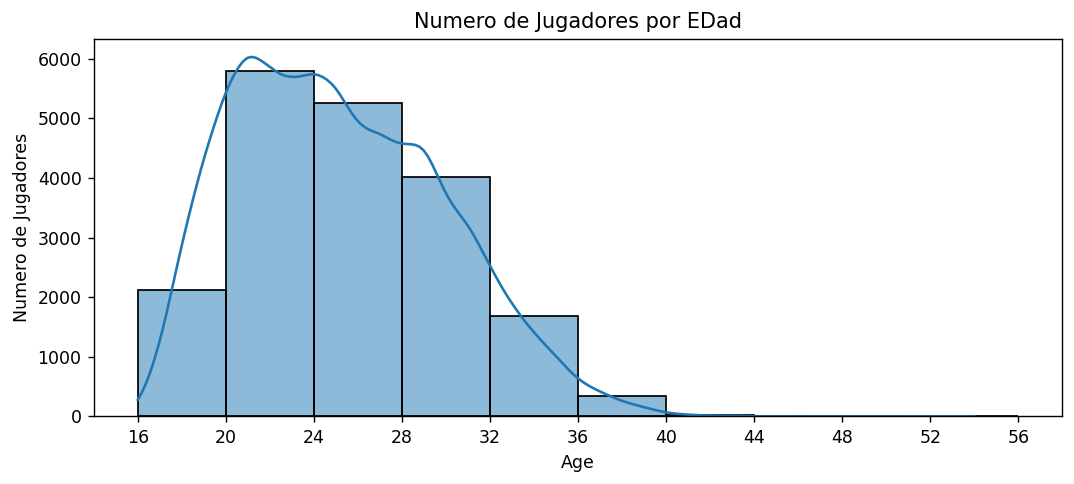

In [17]:
plt.figure( figsize= (10, 4), dpi= 125 )
plt.xlabel('Age')
plt.ylabel('Numero de Jugadores')
plt.xticks( range(16, 57, 4) )
plt.title('Numero de Jugadores por EDad')
sns.histplot(x= 'Age', data= players, bins= np.arange(16, 57, 4), kde= True )

Como se puede observar en el grafico el gruppo de edades con mas representantes es 

el de **20 a 24 años**

<h3><strong> 5: Tomando en cuenta las edades de los jugadores y sus medias. ¿La media de un jugador tiene que ver con su edad? </strong></h3>

<AxesSubplot:title={'center':'Age VS Overall'}, xlabel='Age', ylabel='Overall'>

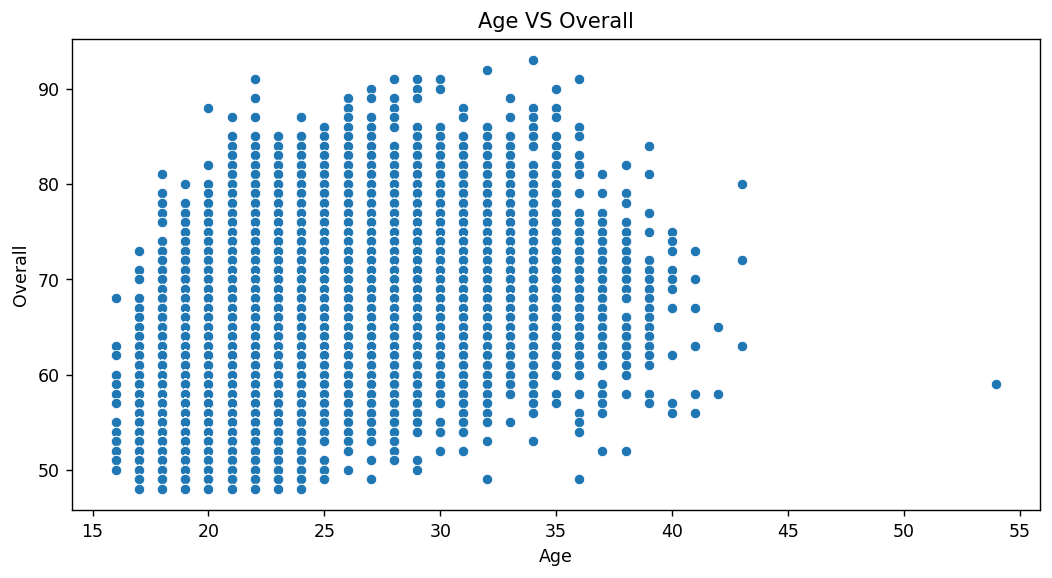

In [18]:
plt.figure( figsize= (10, 5), dpi= 125 )
plt.title('Age VS Overall')
sns.scatterplot( x= 'Age', y= 'Overall', data= players)

Del gráfico se puede obtener que:
- Hay pocos jugadores con una Media superior a los 90 y son jugadores comprendidos entre los 22 y 36 años de edad

- La mayoria de jugadores de 16 a 20 años tienen una Media menor a los 80 puntos 

- El grupo etario de entre los 31 y 36 años con una media entre los 58 y 85 puntos, representan la mayoria de jugadores de FIFA 22

<h3><strong> 6: Distribucion de jugadores de FIFA 22 con respecto a su media (Overall) </strong></h3>

<AxesSubplot:title={'center':'Distribucion de Jugadores Respecto a su Media'}, xlabel='Overall', ylabel='Count'>

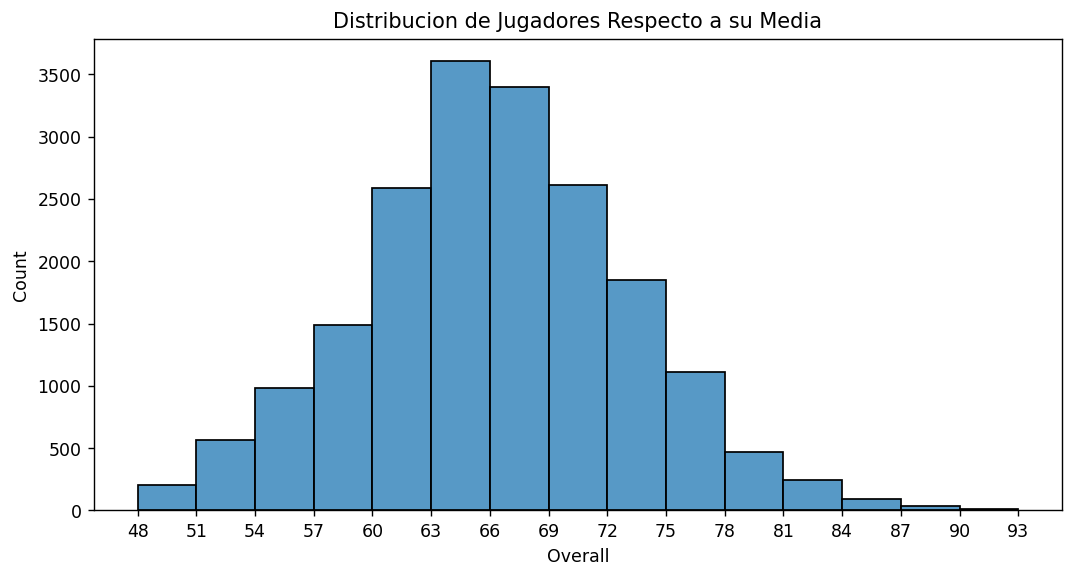

In [19]:
plt.figure( figsize= (10, 5), dpi= 125 )
plt.xticks( range(48, 94, 3) )
plt.title('Distribucion de Jugadores Respecto a su Media')
sns.histplot( x= 'Overall', data= players, bins= np.arange(48, 94, 3) )

- La mayoria de jugadores cuentan con una media entre los 63 y 65 puntos.

- La minoria de se representa a través de jugadores con una media mayor o igual a los 90 puntos.

<h3><strong> 7: Potencial Vs Edad </strong></h3>

<AxesSubplot:title={'center':'Edad VS Potencial'}, xlabel='Edad', ylabel='Potencial'>

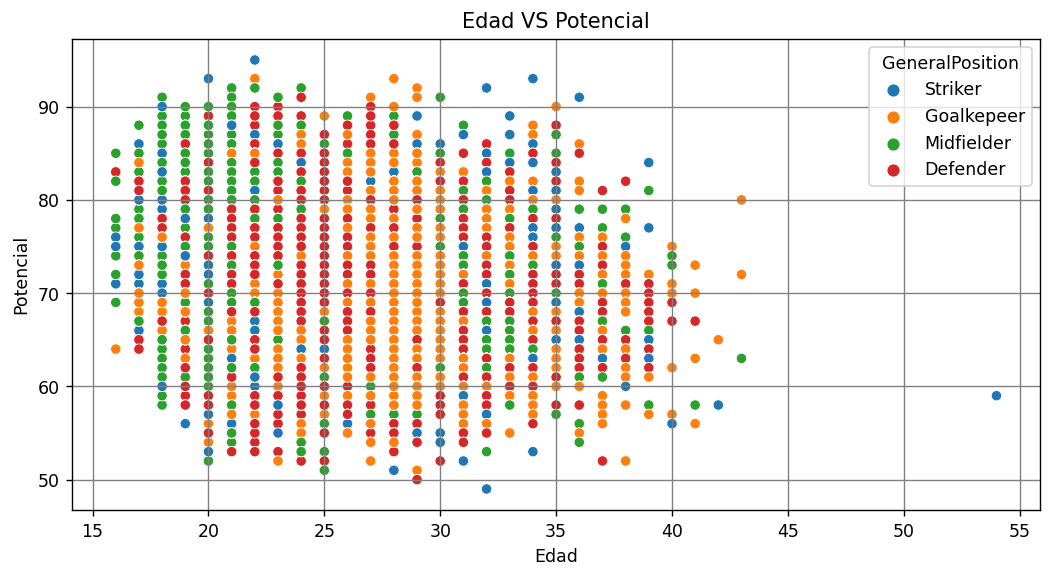

In [20]:
plt.figure( figsize= (10, 5), dpi= 125 )
plt.xlabel('Edad')
plt.ylabel('Potencial')
plt.grid( color= 'gray' )
plt.title('Edad VS Potencial')
sns.scatterplot( x= 'Age', y= 'Potential', data= players , hue= players.GeneralPosition)

Conclusiones de la grafica:
- Si hablamos de jugadores juveniles (de 21 años hacia abajo) podemos ver que la mayoria tiene un potencial menor a 90p puntos
- En si muy pocos jugadores pueden alcanzar una valoración general de 90 puntos hacia arriba

Para poder observar que tan cercana es la relación entre la edad y el potencial de un jugador se calculará la correlación entre estas dos variables

In [21]:
# correlacion Age-Potential
players.Potential.corr( players.Age )

-0.2756460504143811

<m>Como podemos ver la correlación nos arroja un numero negativo por lo tanto podemos conluir que edad no tiene nada que ver con el crecimiento de un jugador</m>

<h3><strong> 8: Top 10 de paises con mas representantes </strong></h3>

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top 10 de Paises con mas Representantes'}, ylabel='Nationality'>

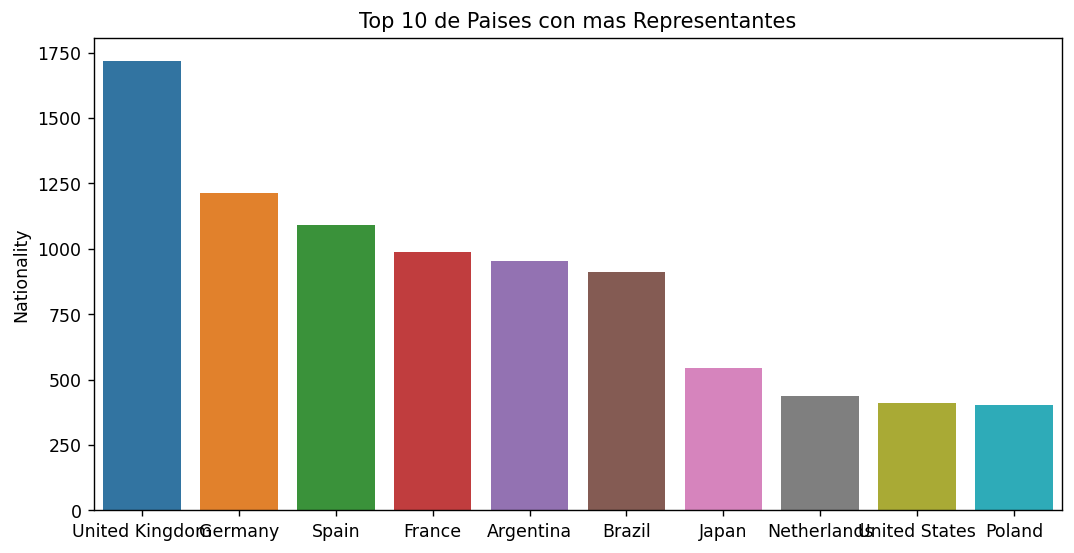

In [22]:
top_countries = countries_players.head(10)
plt.figure( figsize= (10, 5), dpi= 125 )
plt.xticks( range(48, 94, 3) )
plt.title('Top 10 de Paises con mas Representantes')
sns.barplot( top_countries.index, top_countries )

<h3><strong> 9: ¿Cuántos paises tienen FIFA 22? </strong></h3>

In [67]:
print(f'Numero de Nacionalidades: {players.Nationality.nunique()}')

Numero de Nacionalidades: 163


In [70]:
nationalteam = players[ players.NationalTeam.ne('Not in team') ]
print(f'Numero de Selecciones Disponibles: {nationalteam.NationalTeam.nunique()}')

Numero de Selecciones Disponibles: 33


In [73]:
# Selecciones Disponibles
for nt in nationalteam.NationalTeam.unique():
    print(nt, end=', ')

Argentina, Poland, Portugal, France, Belgium, England, Germany, Netherlands, Italy, Spain, Norway, Scotland, Hungary, Denmark, Austria, Sweden, Mexico, Finland, Brazil, Canada, Czech Republic, United States, Wales, Greece, Ukraine, Northern Ireland, New Zealand, China PR, Iceland, Russia, Republic of Ireland, Romania, Australia, 

<h3><strong> 10: ¿Cuántos equipos tienen FIFA 22? </strong></h3>

In [24]:
players.Club.nunique()

702

<h3><strong> 11: ¿Cual es el top 10 de equipos con mas jugadores </strong></h3>

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top 10 de Equipos con mas Representantes'}, ylabel='Club'>

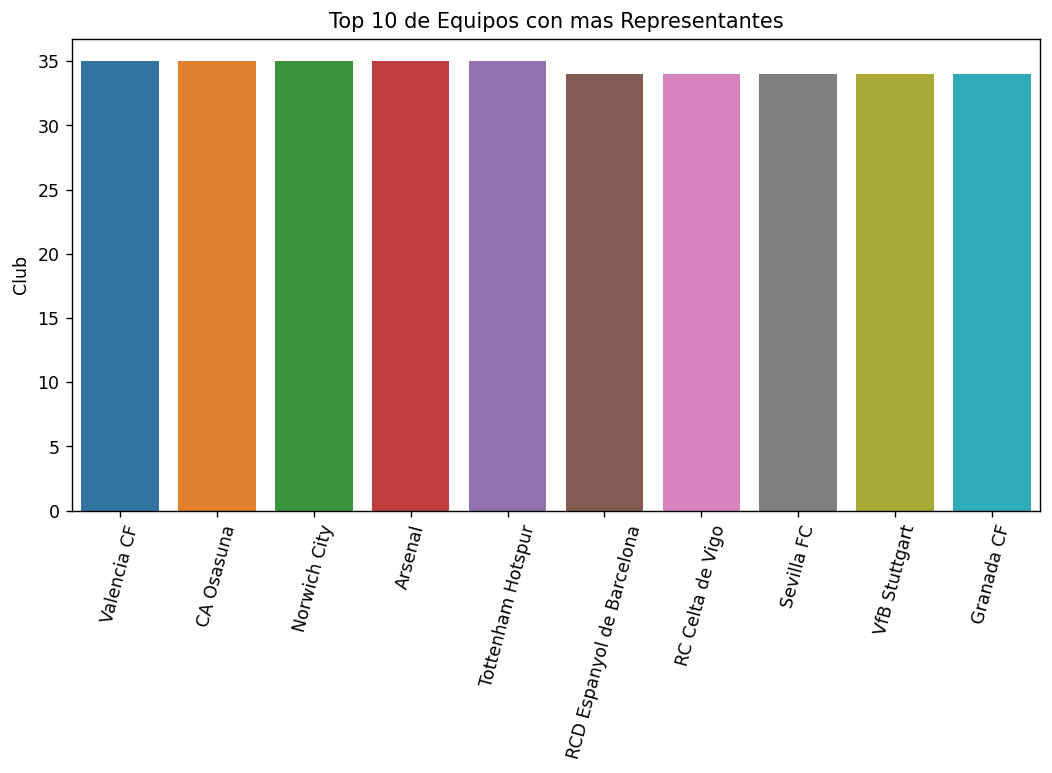

In [25]:
top_clubs = no_freeagent.Club.value_counts().head(10)
plt.figure( figsize= (10, 5), dpi= 125 )
plt.xticks( range(48, 94, 3) )
plt.xticks( rotation= 75 )
plt.title('Top 10 de Equipos con mas Representantes')
sns.barplot( top_clubs.index, top_clubs )

<h3><strong> 12: ¿Cuales son los mejores jugadores juveniles ? </strong></h3>

In [26]:
players[ players.Age <= 21 ][['Name', 'Club', 'Overall', 'Potential']].head(20)

,Name,Club,Overall,Potential
26,E. Haaland,Borussia Dortmund,88,93
46,J. Sancho,Manchester United,87,91
88,M. de Ligt,Juventus,85,90
102,P. Foden,Manchester City,84,92
173,João Félix,Atlético de Madrid,83,91
198,A. Davies,FC Bayern München,82,89
204,A. Isak,Real Sociedad,82,86
205,Ferran Torres,Manchester City,82,90
289,Pedri,FC Barcelona,81,91
291,D. Kulusevski,Juventus,81,89


<h3><strong> 13: ¿Cuáles son los jugadores mejor pagados Top10? </strong></h3>

In [27]:
top_highest_pai = players.nlargest(10, 'WageEUR')[['Name', 'Club', 'WageEUR']]
top_highest_pai

,Name,Club,WageEUR
5,K. De Bruyne,Manchester City,350000
13,K. Benzema,Real Madrid CF,350000
0,L. Messi,Paris Saint-Germain,320000
12,Casemiro,Real Madrid CF,310000
25,T. Kroos,Real Madrid CF,310000
29,R. Sterling,Manchester City,290000
1,R. Lewandowski,FC Bayern München,270000
2,Cristiano Ronaldo,Manchester United,270000
6,Neymar Jr,Paris Saint-Germain,270000
15,S. Mané,Liverpool,270000


<AxesSubplot:title={'center':'Top 10 Jugadores Mejor Pagados'}, xlabel='Name', ylabel='WageEUR'>

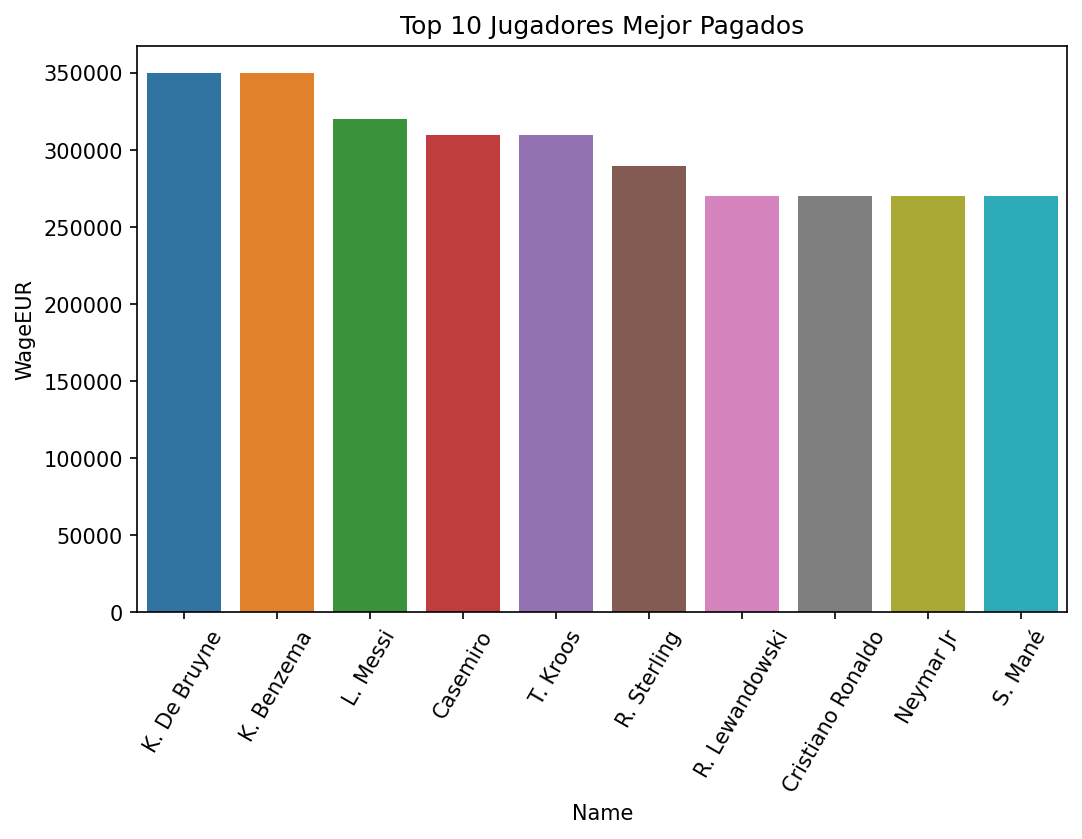

In [28]:
plt.figure( figsize=(8, 5), dpi= 150 )
plt.xticks( rotation= 60 )
plt.title('Top 10 Jugadores Mejor Pagados')
sns.barplot( x= top_highest_pai.Name, y= top_highest_pai.WageEUR, data= top_highest_pai )

<h3><strong> 14: ¿Cuáles son los jugadores mas caros Top10? </strong></h3>

In [29]:
top_highest_value = players.nlargest(10, 'ValueEUR')[['Name', 'Club', 'WageEUR', 'ValueEUR']]
top_highest_value


,Name,Club,WageEUR,ValueEUR
3,K. Mbappé,Paris Saint-Germain,230000,194000000
26,E. Haaland,Borussia Dortmund,110000,137500000
8,H. Kane,Tottenham Hotspur,240000,129500000
6,Neymar Jr,Paris Saint-Germain,270000,129000000
5,K. De Bruyne,Manchester City,350000,125500000
1,R. Lewandowski,FC Bayern München,270000,119500000
17,G. Donnarumma,Paris Saint-Germain,110000,119500000
41,F. de Jong,FC Barcelona,210000,119500000
46,J. Sancho,Manchester United,150000,116500000
42,T. Alexander-Arnold,Liverpool,150000,114000000


<AxesSubplot:title={'center':'Top 10 Jugadores Mejor Pagados'}, xlabel='Name', ylabel='ValueEUR'>

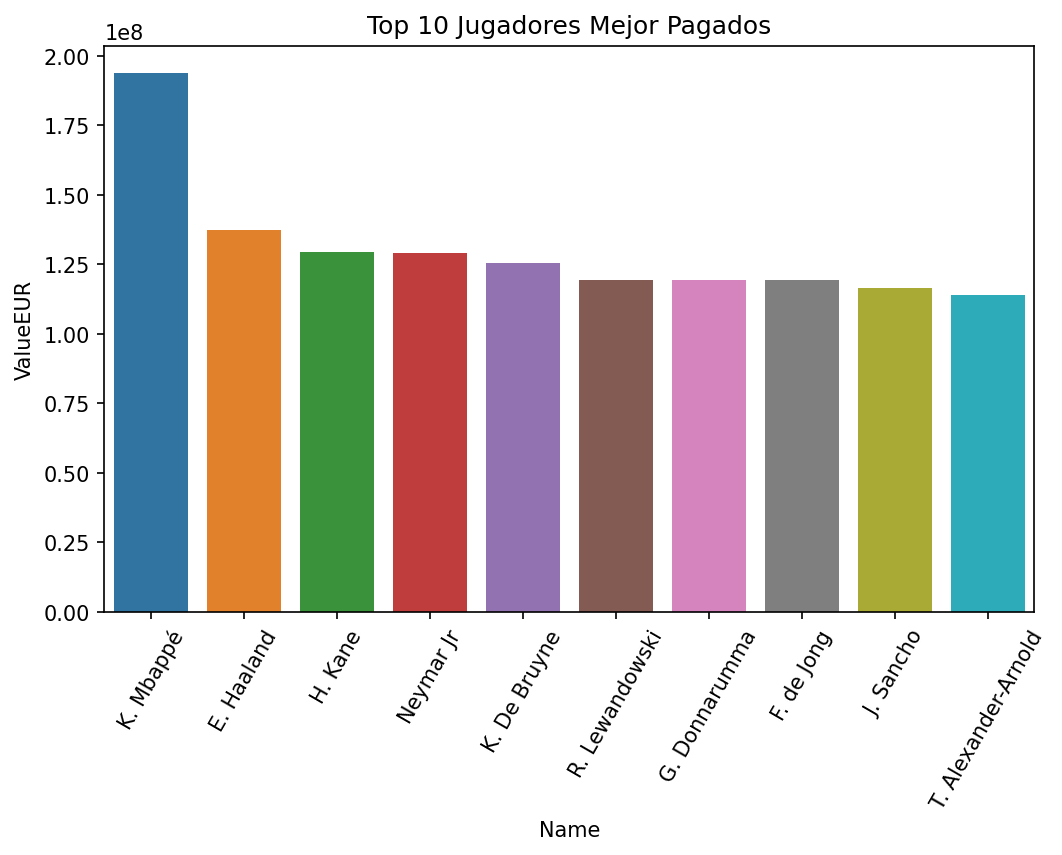

In [30]:
plt.figure( figsize=(8, 5), dpi= 150 )
plt.xticks( rotation= 60 )
plt.title('Top 10 Jugadores Mejor Pagados')
sns.barplot( x= top_highest_value.Name, y= top_highest_value.ValueEUR, data= top_highest_pai )

<h3><strong> 15: ¿Cuáles son los jugadores mas rapidos Top10? </strong></h3>

In [31]:
top_speed_players = players.nlargest(20, 'SprintSpeed')[['Name', 'Club', 'BestPosition', 'SprintSpeed']]
top_speed_players


,Name,Club,BestPosition,SprintSpeed
3,K. Mbappé,Paris Saint-Germain,ST,97
198,A. Davies,FC Bayern München,LB,96
805,Adama Traoré,Wolverhampton Wanderers,RM,96
89,A. Hakimi,Paris Saint-Germain,RB,95
441,Vinícius Jr.,Real Madrid CF,RM,95
1097,D. James,Leeds United,RM,95
3735,G. Holtmann,VfL Bochum 1848,LM,95
26,E. Haaland,Borussia Dortmund,ST,94
82,K. Walker,Manchester City,RB,94
119,T. Hernández,AC Milan,LB,94


<h3><strong> 16: ¿Cuáles son los mejores rematadores? </strong></h3>

In [32]:
top_shooting_players = players.nlargest(20, 'ShootingTotal')[['Name', 'Club', 'BestPosition', 'ShootingTotal']]
top_shooting_players

,Name,Club,BestPosition,ShootingTotal
2,Cristiano Ronaldo,Manchester United,ST,94
0,L. Messi,Paris Saint-Germain,RW,92
1,R. Lewandowski,FC Bayern München,ST,92
4,J. Oblak,Atlético de Madrid,GK,92
8,H. Kane,Tottenham Hotspur,ST,91
26,E. Haaland,Borussia Dortmund,ST,91
24,L. Suárez,Atlético de Madrid,ST,90
14,T. Courtois,Real Madrid CF,GK,89
44,S. Agüero,FC Barcelona,ST,89
3,K. Mbappé,Paris Saint-Germain,ST,88


<h3><strong> 17: ¿Cuáles son los mejores dribleadores?. Sin contar los porteros </strong></h3>

In [33]:
dribbling_players = players[ players.BestPosition.ne('GK') ]
top_dribbling_players = dribbling_players.nlargest(25, 'DribblingTotal')[['Name', 'Club', 'BestPosition', 'DribblingTotal']]
top_dribbling_players

,Name,Club,BestPosition,DribblingTotal
0,L. Messi,Paris Saint-Germain,RW,95
6,Neymar Jr,Paris Saint-Germain,LW,94
3,K. Mbappé,Paris Saint-Germain,ST,92
30,M. Verratti,Paris Saint-Germain,CM,91
39,P. Dybala,Juventus,CAM,91
46,J. Sancho,Manchester United,CAM,91
67,Bernardo Silva,Manchester City,CAM,91
15,S. Mané,Liverpool,LW,90
18,M. Salah,Liverpool,RW,90
50,L. Insigne,Napoli,LW,90


<h3><strong> 18: ¿Cuáles son los jugadores con mejor valoración en pases? </strong></h3>

In [34]:
top_passing_players = dribbling_players.nlargest(20, 'PassingTotal')[['Name', 'Club', 'BestPosition', 'PassingTotal']]
top_passing_players

,Name,Club,BestPosition,PassingTotal
5,K. De Bruyne,Manchester City,CM,93
0,L. Messi,Paris Saint-Germain,RW,91
25,T. Kroos,Real Madrid CF,CM,91
52,Parejo,Villarreal CF,CM,90
28,Bruno Fernandes,Manchester United,CAM,89
31,L. Modrić,Real Madrid CF,CM,89
42,T. Alexander-Arnold,Liverpool,RB,88
238,C. Eriksen,Inter,CM,88
30,M. Verratti,Paris Saint-Germain,CM,87
75,David Silva,Real Sociedad,CAM,87


<h3><strong> 19: ¿Cuáles son los jugadores con mejor valoración en centros? </strong></h3>

In [35]:
top_crossing_players = dribbling_players.nlargest(20, 'Crossing')[['Name', 'Club', 'BestPosition', 'Crossing']]
top_crossing_players 

,Name,Club,BestPosition,Crossing
5,K. De Bruyne,Manchester City,CM,94
42,T. Alexander-Arnold,Liverpool,RB,92
20,J. Kimmich,FC Bayern München,CDM,91
133,F. Kostić,Eintracht Frankfurt,LM,91
845,Pedro León,CF Fuenlabrada,CAM,91
393,P. Max,PSV,LB,90
304,J. Ward-Prowse,Southampton,CM,89
376,J. Rodríguez,Everton,CAM,89
25,T. Kroos,Real Madrid CF,CM,88
32,A. Di María,Paris Saint-Germain,RW,88


<h3><strong> 20: ¿Cuáles son los jugadores menos altos y mas altos? </strong></h3>

In [36]:
# mas pequeño
players.nsmallest(1, 'Height')[['Name', 'Club', 'Height']]

,Name,Club,Height
15817,M. García,Club Universidad Nacional,155


In [37]:
# mas alto
players.nlargest(1, 'Height')[['Name', 'Club', 'Height']]

,Name,Club,Height
10965,T. Holý,Ipswich Town,206


- El jugador mas alto de FIFA 22 es T. Holy conn 2.06 m de altura.
- El jugador mas pequeño es M. Garcia con 1.55m de altura

<h3><strong> 21: ¿Existe una relacion clara entre la altura de un jugador y su nivel de salto? </strong></h3>

<h3><strong> Además encontrar la correlacion entre la altura y el salto </strong></h3>

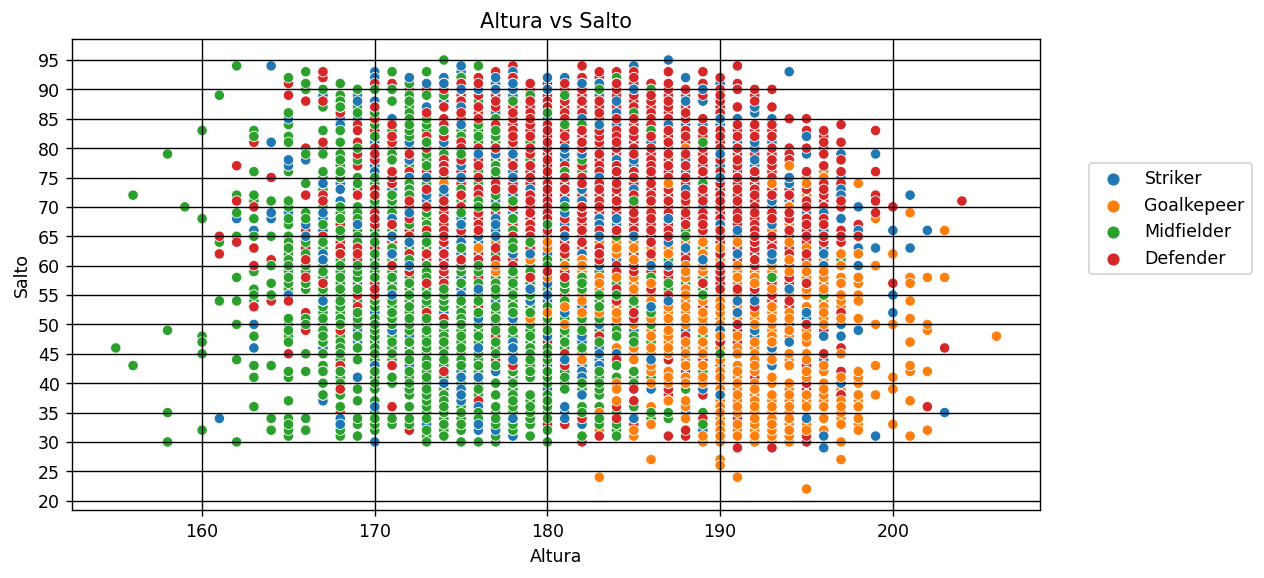

In [38]:
plt.figure( figsize= (10, 5), dpi= 125 )
plt.grid( color= 'black' )
plt.xlabel('Altura')
plt.ylabel('Salto')
plt.yticks(range(20, 100, 5))
plt.title('Altura vs Salto')
sns.scatterplot( x= 'Height', y= 'Jumping', data= players, hue= 'GeneralPosition', palette= 'tab10' )
plt.legend( loc=(1.05, 0.5) )

In [39]:
# correlacion altura-salto
print( f'Correlacion Altura-Sato: {players.Height.corr( players.Jumping )}' )

Correlacion Altura-Sato: 0.014144603552410559


Datos del Graficos:
- Teniendo en cuenta el grafico y el resultado de la correlacion, no tiene casi nada que ver la altura con la valoracion de salto.
- Varios jugadores entre 1.60 mts y 1.80mts, tienen una valoracion de mas de 90.
-Tenemos dos jugadores que sobrepasan los 95 puntos de valoración en el salto uno de ellos con 1.74mts de altura y otro con 1.88mts de altura.
- Si tomamos en cuenta alturas de 1.90mts en adelante vemos que pocos jugadores pasan los 90 puntos de valoracion en el salto
- Asi tambien podemos ver que existe una gran cncentracion de defensas que tienen una valoración de mas de 80 puntos y alturas de mas omenos 1.75mts en adelante
- Tambien observamos que mediocampistas y arqueros en su mayoria no tienen una buena valoracion al momento de saltar.

<h2>Análisis de Defensas de FIFA 22</h2>

<h3><strong> 1: ¿Vuales son los mejores defensores? </strong></h3>

In [40]:
defenders_df.nlargest(20, 'Overall')[['Name', 'Nationality', 'Club', 'Overall']]

,Name,Nationality,Club,Overall
16,V. van Dijk,Netherlands,Liverpool,89
23,Sergio Ramos,Spain,Paris Saint-Germain,88
38,Marquinhos,Brazil,Paris Saint-Germain,87
40,A. Robertson,Scotland,Liverpool,87
42,T. Alexander-Arnold,United Kingdom,Liverpool,87
43,Rúben Dias,Portugal,Manchester City,87
47,K. Koulibaly,Senegal,Napoli,86
48,M. Škriniar,Slovakia,Inter,86
49,R. Varane,France,Manchester United,86
55,Jordi Alba,Spain,FC Barcelona,86


<h3><strong> 2: ¿Cuales son los mejores defensas juveniles con mayor posibilidad de crecimiento? </strong></h3>

In [41]:
defenders_df[ defenders_df.Age <= 21 ].nlargest(30, 'Potential')[['Name', 'Nationality', 'Club', 'Potential', 'Age']]

,Name,Nationality,Club,Potential,Age
88,M. de Ligt,Netherlands,Juventus,90,21
198,A. Davies,Canada,FC Bayern München,89,20
750,Nuno Mendes,Portugal,Paris Saint-Germain,88,19
435,Pedro Porro,Spain,Sporting CP,87,21
1927,J. Gvardiol,Croatia,RB Leipzig,87,19
1945,J. Gvardiol,Croatia,RB Leipzig,87,19
297,R. James,United Kingdom,Chelsea,86,21
634,M. Lacroix,France,VfL Wolfsburg,86,21
749,W. Fofana,France,Leicester City,86,20
1050,Eric García,Spain,FC Barcelona,86,20


<h3><strong> 3: ¿Cuales son los mejores defensas juveniles baratos pero con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [42]:
defenders_df[  (defenders_df.Age <= 21) & (defenders_df.Potential >= 80) ].nsmallest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
17053,L. Bogarde,Aston Villa,17,58,81,600000,500
16787,Christian Marques,Wolverhampton Wanderers,18,58,80,625000,3000
15370,M. Paskotsi,Tottenham Hotspur,18,60,80,650000,3000
16248,R. van den Berg,PEC Zwolle,16,59,83,675000,500
16037,C. Wiggett,Newcastle United,18,59,80,700000,2000
15446,N. Collins,Borussia Dortmund,17,60,82,725000,500
15191,M. Fagan-Walcott,Tottenham Hotspur,19,61,80,800000,6000
14537,Z. Debast,RSC Anderlecht,17,61,81,850000,500
15115,S. Coulibaly,Borussia Dortmund,17,61,81,850000,500
14910,Recasens,RCD Espanyol de Barcelona,19,61,81,875000,1000


<h3><strong> 4: ¿Cuales son los mejores defensas juveniles mas caros y con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [43]:
defenders_df[  (defenders_df.Age <= 21) & (defenders_df.Potential >= 80) ].nlargest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
88,M. de Ligt,Juventus,21,85,90,75000000,81000
198,A. Davies,FC Bayern München,20,82,89,57000000,59000
435,Pedro Porro,Sporting CP,21,80,87,40500000,80000
297,R. James,Chelsea,21,81,86,37000000,76000
634,M. Lacroix,VfL Wolfsburg,21,79,86,33000000,42000
749,W. Fofana,Leicester City,20,78,86,29000000,57000
750,Nuno Mendes,Paris Saint-Germain,19,78,88,29000000,8000
319,Welington Dano,Clube Atlético Mineiro,21,81,81,27500000,31000
606,S. Botman,LOSC Lille,21,79,85,25500000,27000
651,O. Wijndal,AZ Alkmaar,21,79,84,25000000,10000


<h3><strong> 5: ¿Cuales son los defensas mas baratos pero con buen potencial y media? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [44]:
defenders_df[  (defenders_df.Overall >= 75) & (defenders_df.Potential >= 80) ].nsmallest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
159,T. Alderweireld,Free agent,32,83,83,0,0
351,José Fonte,LOSC Lille,37,81,81,4600000,30000
226,Pepe,FC Porto,38,82,82,5500000,14000
427,D. Godín,Cagliari,35,80,80,5500000,27000
425,Nacho Monreal,Real Sociedad,35,80,80,6500000,26000
424,M. Benatia,Fatih Karagümrük S.K.,34,80,80,7000000,19000
1491,Martín,Deportivo Alavés,25,75,80,7500000,20000
1558,Murilo,FC Lokomotiv Moscow,24,75,80,7500000,33000
1668,Murilo,FC Lokomotiv Moscow,24,75,80,7500000,33000
1676,Martín,Deportivo Alavés,25,75,80,7500000,20000


<h3><strong> 6: ¿Cuales son los defensas mas caros con las caracteristicas especificadas abajo? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [45]:
defenders_df[  (defenders_df.Overall >= 75) & (defenders_df.Potential >= 80) ].nlargest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
42,T. Alexander-Arnold,Liverpool,22,87,92,114000000,150000
43,Rúben Dias,Manchester City,24,87,91,102500000,170000
38,Marquinhos,Paris Saint-Germain,27,87,90,90500000,135000
16,V. van Dijk,Liverpool,29,89,89,86000000,230000
40,A. Robertson,Liverpool,27,87,88,83500000,175000
65,A. Laporte,Manchester City,27,86,89,77000000,185000
88,M. de Ligt,Juventus,21,85,90,75000000,81000
48,M. Škriniar,Inter,26,86,88,74000000,150000
64,João Cancelo,Manchester City,27,86,87,71500000,185000
89,A. Hakimi,Paris Saint-Germain,22,85,88,69500000,100000


<h2>Análisis de Arqueros de FIFA 22</h2>

<h3><strong> 1: ¿Vuales son los mejores arqueros? </strong></h3>

In [46]:
goalkeeper_df.nlargest(20, 'Overall')[['Name', 'Nationality', 'Club', 'Overall']]

,Name,Nationality,Club,Overall
4,J. Oblak,Slovenia,Atlético de Madrid,91
9,M. ter Stegen,Germany,FC Barcelona,90
10,M. Neuer,Germany,FC Bayern München,90
14,T. Courtois,Belgium,Real Madrid CF,89
17,G. Donnarumma,Italy,Paris Saint-Germain,89
19,Ederson,Brazil,Manchester City,89
21,Alisson,Brazil,Liverpool,89
27,K. Navas,Costa Rica,Paris Saint-Germain,88
33,W. Szczęsny,Poland,Juventus,87
45,H. Lloris,France,Tottenham Hotspur,87


<h3><strong> 2: ¿Cuales son los mejores arqueros juveniles con mayor posibilidad de crecimiento? </strong></h3>

In [47]:
goalkeeper_df[ goalkeeper_df.Age <= 21 ].nlargest(30, 'Potential')[['Name', 'Nationality', 'Club', 'Potential', 'Age']]

,Name,Nationality,Club,Potential,Age
4183,M. Vandevoordt,Belgium,KRC Genk,87,19
1068,I. Meslier,France,Leeds United,85,21
2984,Diogo Costa,Portugal,FC Porto,85,21
3764,L. Morales,Argentina,Club Atlético Lanús,85,21
16929,C. Chatzigavriel,Cyprus,Free agent,84,17
1789,G. Mamardashvili,Georgia,Valencia CF,83,20
1932,G. Mamardashvili,Georgia,Valencia CF,83,20
6825,D. Alemdar,Turkey,Stade Rennais FC,83,18
8011,K. Tzolakis,Greece,Olympiacos CFP,83,18
8258,Joan García,Spain,RCD Espanyol de Barcelona,83,20


<h3><strong> 3: ¿Cuales son los mejores arqueros juveniles baratos pero con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [48]:
goalkeeper_df[  (goalkeeper_df.Age <= 21) & (goalkeeper_df.Potential >= 80) ].nsmallest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
16929,C. Chatzigavriel,Free agent,17,58,84,0,0
16191,C. Boyce-Clarke,Reading,18,59,81,650000,500
14375,Alejandro Iturbe,Atlético de Madrid,17,62,81,875000,500
13595,Pere Joan,RCD Mallorca,19,62,81,900000,1000
12337,C. Rushworth,Walsall,19,63,80,1100000,1000
12675,J. Olschowsky,Borussia Mönchengladbach,19,63,80,1100000,2000
13209,X. Dziekoński,Jagiellonia Białystok,17,63,80,1100000,500
11220,G. Bazunu,Portsmouth,19,64,82,1300000,1000
11641,L. Chevalier,Valenciennes FC,19,64,80,1300000,2000
11851,R. Neshcheret,Dynamo Kyiv,19,64,80,1300000,500


<h3><strong> 4: ¿Cuales son los mejores arqueros juveniles mas caros y con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [49]:
goalkeeper_df[  (goalkeeper_df.Age <= 21) & (goalkeeper_df.Potential >= 80) ].nlargest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
1068,I. Meslier,Leeds United,21,77,85,20500000,34000
1789,G. Mamardashvili,Valencia CF,20,75,83,10500000,14000
1932,G. Mamardashvili,Valencia CF,20,75,83,10500000,14000
2984,Diogo Costa,FC Porto,21,73,85,6500000,5000
3764,L. Morales,Club Atlético Lanús,21,72,85,5000000,6000
3398,E. Destanoğlu,Beşiktaş JK,20,72,80,4400000,14000
3494,E. Green,AS Saint-Étienne,20,72,81,4400000,11000
4183,M. Vandevoordt,KRC Genk,19,71,87,4300000,3000
3947,M. Okoye,Sparta Rotterdam,21,71,81,3600000,4000
6237,K. Scherpen,Brighton & Hove Albion,21,69,81,3000000,12000


<h3><strong> 5: ¿Cuales son los arqueros mas baratos pero con buen potencial y media? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [50]:
goalkeeper_df[  (goalkeeper_df.Overall >= 75) & (goalkeeper_df.Potential >= 80) ].nsmallest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
413,G. Buffon,Parma,43,80,80,2300000,18000
414,G. Ochoa,Club América,35,80,80,2300000,27000
415,I. Akinfeev,PFC CSKA Moscow,35,80,80,2300000,26000
447,F. Muslera,Galatasaray SK,35,80,80,2300000,32000
349,S. Mandanda,Olympique de Marseille,36,81,81,2900000,24000
261,L. Fabiański,West Ham United,36,82,82,3400000,43000
396,F. Armani,River Plate,34,80,80,3600000,17000
475,Guaita,Crystal Palace,34,80,80,3600000,48000
354,Adán,Sporting CP,34,81,81,4400000,14000
377,A. Consigli,U.S. Sassuolo Calcio,34,81,81,4400000,32000


<h3><strong> 6: ¿Cuales son los arqueros mas caros con las caracteristicas especificadas abajo? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [51]:
goalkeeper_df[  (goalkeeper_df.Overall >= 75) & (goalkeeper_df.Potential >= 80) ].nlargest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
17,G. Donnarumma,Paris Saint-Germain,22,89,93,119500000,110000
4,J. Oblak,Atlético de Madrid,28,91,93,112000000,130000
9,M. ter Stegen,FC Barcelona,29,90,92,99000000,250000
19,Ederson,Manchester City,27,89,91,94000000,200000
14,T. Courtois,Real Madrid CF,29,89,91,85500000,250000
21,Alisson,Liverpool,28,89,90,82000000,190000
51,K. Casteels,VfL Wolfsburg,29,86,87,52000000,88000
138,M. Maignan,AC Milan,25,84,89,49500000,45000
33,W. Szczęsny,Juventus,31,87,87,42000000,105000
431,D. Henderson,Manchester United,24,80,87,36000000,70000


<h2>Análisis de Mediocampistas de FIFA 22</h2>

<h3><strong> 1: ¿Vuales son los mejores mediocampistas? </strong></h3>

In [52]:
midfielders_df.nlargest(20, 'Overall')[['Name', 'Nationality', 'Club', 'Overall']]

,Name,Nationality,Club,Overall
5,K. De Bruyne,Belgium,Manchester City,91
7,N. Kanté,France,Chelsea,90
11,H. Son,Korea Republic,Tottenham Hotspur,89
12,Casemiro,Brazil,Real Madrid CF,89
20,J. Kimmich,Germany,FC Bayern München,89
25,T. Kroos,Germany,Real Madrid CF,88
28,Bruno Fernandes,Portugal,Manchester United,88
30,M. Verratti,Italy,Paris Saint-Germain,87
31,L. Modrić,Croatia,Real Madrid CF,87
34,T. Müller,Germany,FC Bayern München,87


<h3><strong> 2: ¿Cuales son los mejores mediocampistas juveniles con mayor posibilidad de crecimiento? </strong></h3>

In [53]:
midfielders_df[ midfielders_df.Age <= 21 ].nlargest(30, 'Potential')[['Name', 'Nationality', 'Club', 'Potential', 'Age']]

,Name,Nationality,Club,Potential,Age
102,P. Foden,United Kingdom,Manchester City,92,21
46,J. Sancho,United Kingdom,Manchester United,91,21
173,João Félix,Portugal,Atlético de Madrid,91,21
289,Pedri,Spain,FC Barcelona,91,18
205,Ferran Torres,Spain,Manchester City,90,21
441,Vinícius Jr.,Brazil,Real Madrid CF,90,20
743,R. Gravenberch,Netherlands,Ajax,90,19
291,D. Kulusevski,Sweden,Juventus,89,21
607,J. Bellingham,United Kingdom,Borussia Dortmund,89,18
737,M. Greenwood,United Kingdom,Manchester United,89,19


<h3><strong> 3: ¿Cuales son los mejores mediocampistas juveniles baratos pero con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [54]:
midfielders_df[  (midfielders_df.Age <= 21) & (midfielders_df.Potential >= 80) ].nsmallest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
12500,M. Stamenic,Free agent,19,63,80,0,0
17194,A. Devine,Tottenham Hotspur,16,57,82,500000,1000
15479,E. Pizzuto,LOSC Lille,19,60,80,650000,2000
17023,A. Robertson,Ross County FC,18,58,81,650000,500
15451,L. Egloff,VfB Stuttgart,18,60,80,675000,1000
15621,K. Baah,Watford,18,60,80,675000,3000
15712,O. Holm,Vålerenga Fotball,18,60,80,675000,500
15409,T. Onyango,Everton,18,60,81,775000,4000
15915,P. Dwomoh,Royal Antwerp FC,17,60,85,775000,500
14612,R. Ndiaye,FC Sochaux-Montbéliard,19,61,80,800000,650


<h3><strong> 4: ¿Cuales son los mejores mediocampistas juveniles mas caros y con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [55]:
midfielders_df[  (midfielders_df.Age <= 21) & (midfielders_df.Potential >= 80) ].nlargest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
46,J. Sancho,Manchester United,21,87,91,116500000,150000
102,P. Foden,Manchester City,21,84,92,94500000,125000
173,João Félix,Atlético de Madrid,21,83,91,82000000,61000
205,Ferran Torres,Manchester City,21,82,90,68500000,120000
291,D. Kulusevski,Juventus,21,81,89,58000000,72000
289,Pedri,FC Barcelona,18,81,91,54000000,51000
294,M. Diaby,Bayer 04 Leverkusen,21,81,88,52500000,52000
441,Vinícius Jr.,Real Madrid CF,20,80,90,46500000,120000
432,B. Saka,Arsenal,19,80,88,45500000,50000
608,Antony,Ajax,21,79,88,39500000,17000


<h3><strong> 5: ¿Cuales son los mediocampistas mas baratos pero con buen potencial y media? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [56]:
midfielders_df[  (midfielders_df.Overall >= 75) & (midfielders_df.Potential >= 80) ].nsmallest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
480,G. Krychowiak,Free agent,31,80,80,0,0
478,E. Pérez,River Plate,35,80,80,6000000,15000
153,Fernandinho,Manchester City,36,83,83,7000000,100000
1474,F. Onyeka,Brentford,23,75,81,8000000,33000
1480,M. Grujić,FC Porto,25,75,80,8000000,12000
1533,G. Kamara,Rangers FC,25,75,80,8000000,44000
1584,Y. Neyou,AS Saint-Étienne,24,75,80,8000000,23000
1594,F. Onyeka,Brentford,23,75,81,8000000,33000
1602,J. Campuzano,Boca Juniors,25,75,81,8000000,14000
1642,M. Camara,AS Saint-Étienne,23,75,80,8000000,23000


<h3><strong> 6: ¿Cuales son los mediocampistas mas caros con las caracteristicas especificadas abajo? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [57]:
midfielders_df[  (midfielders_df.Overall >= 75) & (midfielders_df.Potential >= 80) ].nlargest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
5,K. De Bruyne,Manchester City,30,91,91,125500000,350000
41,F. de Jong,FC Barcelona,24,87,92,119500000,210000
46,J. Sancho,Manchester United,21,87,91,116500000,150000
20,J. Kimmich,FC Bayern München,26,89,90,108000000,160000
28,Bruno Fernandes,Manchester United,26,88,89,107500000,250000
11,H. Son,Tottenham Hotspur,28,89,89,104000000,220000
7,N. Kanté,Chelsea,30,90,90,100000000,230000
102,P. Foden,Manchester City,21,84,92,94500000,125000
117,K. Havertz,Chelsea,22,84,92,94500000,130000
37,L. Goretzka,FC Bayern München,26,87,88,93000000,140000


<h2>Análisis de Atacantes de FIFA 22</h2>

<h3><strong> 1: ¿Vuales son los mejores delanteros? </strong></h3>

In [58]:
forwards_df.nlargest(20, 'Overall')[['Name', 'Nationality', 'Club', 'Overall']]

,Name,Nationality,Club,Overall
0,L. Messi,Argentina,Paris Saint-Germain,93
1,R. Lewandowski,Poland,FC Bayern München,92
2,Cristiano Ronaldo,Portugal,Manchester United,91
3,K. Mbappé,France,Paris Saint-Germain,91
6,Neymar Jr,Brazil,Paris Saint-Germain,91
8,H. Kane,United Kingdom,Tottenham Hotspur,90
13,K. Benzema,France,Real Madrid CF,89
15,S. Mané,Senegal,Liverpool,89
18,M. Salah,Egypt,Liverpool,89
22,R. Lukaku,Belgium,Chelsea,88


<h3><strong> 2: ¿Cuales son los mejores delanteros juveniles con mayor posibilidad de crecimiento? </strong></h3>

In [59]:
forwards_df[ forwards_df.Age <= 21 ].nlargest(30, 'Potential')[['Name', 'Nationality', 'Club', 'Potential', 'Age']]

,Name,Nationality,Club,Potential,Age
26,E. Haaland,Norway,Borussia Dortmund,93,20
1415,Ansu Fati,Spain,FC Barcelona,90,18
2312,G. Raspadori,Italy,U.S. Sassuolo Calcio,88,21
661,M. Kean,Italy,Juventus,87,21
1394,A. Hložek,Czech Republic,AC Sparta Praha,87,18
204,A. Isak,Sweden,Real Sociedad,86,21
761,J. David,Canada,LOSC Lille,86,21
2440,A. Sima,Senegal,Stoke City,86,20
3095,Gonçalo Ramos,Portugal,SL Benfica,86,20
7391,B. Šeško,Slovenia,FC Red Bull Salzburg,86,18


<h3><strong> 3: ¿Cuales son los mejores delanteros juveniles baratos pero con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [60]:
forwards_df[  (forwards_df.Age <= 21) & (forwards_df.Potential >= 80) ].nsmallest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
16873,J. Carabalí,Club Deportes Tolima,18,58,80,650000,500
16965,W. Gnonto,FC Zürich,17,58,80,650000,650
17004,J. Marshall-Rutty,Toronto FC,17,58,80,650000,500
17011,J. Riasco,Deportivo La Guaira FC,17,58,80,650000,500
15296,Salazar,Real Madrid CF,18,60,80,675000,8000
15392,R. Jones,Peterborough United,18,60,80,675000,1000
15408,D. Touré,Watford,18,60,83,775000,3000
14703,A. Buksa,Genoa,18,61,80,825000,1000
14627,J. Stansfield,Fulham,18,61,81,900000,4000
14714,Pablo Felipe,Futebol Clube de Famalicão,17,61,81,900000,500


<h3><strong> 4: ¿Cuales son los mejores delanteros juveniles mas caros y con un potencial considerable? </strong></h3>
<strong>Potencial = 80+ </strong>

In [61]:
forwards_df[  (forwards_df.Age <= 21) & (forwards_df.Potential >= 80) ].nlargest(10, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
26,E. Haaland,Borussia Dortmund,20,88,93,137500000,110000
204,A. Isak,Real Sociedad,21,82,86,45000000,37000
661,M. Kean,Juventus,21,79,87,39500000,69000
761,J. David,LOSC Lille,21,78,86,32000000,31000
744,D. Vlahović,Fiorentina,21,78,85,29000000,43000
1415,Ansu Fati,FC Barcelona,18,76,90,17500000,44000
1453,M. Boadu,AS Monaco,20,76,85,16500000,36000
1394,A. Hložek,AC Sparta Praha,18,76,87,16000000,500
1625,J. Macías,Getafe CF,21,75,84,12500000,34000
1840,J. Macías,Getafe CF,21,75,84,12500000,34000


<h3><strong> 5: ¿Cuales son los delanteros mas baratos pero con buen potencial y media? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [62]:
forwards_df[  (forwards_df.Overall >= 75) & (forwards_df.Potential >= 80) ].nsmallest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
1573,J. Mateta,Crystal Palace,24,75,80,8500000,22000
1578,A. Sobolev,Spartak Moskva,24,75,80,8500000,45000
1581,M. Berisha,Fenerbahçe SK,23,75,80,8500000,40000
1615,Carlos Fernández,Real Sociedad,25,75,80,8500000,29000
1648,A. Sobolev,Spartak Moskva,24,75,80,8500000,45000
1675,Manu Vallejo,Valencia CF,24,75,80,8500000,29000
1757,J. Mateta,Crystal Palace,24,75,80,8500000,22000
1935,J. Kuchta,SK Slavia Praha,24,75,80,8500000,950
1579,J. Hernández,Watford,22,75,81,9000000,44000
1704,Marcos André,Valencia CF,24,75,81,9000000,29000


<h3><strong> 6: ¿Cuales son los delanteros mas caros con las caracteristicas especificadas abajo? </strong></h3>
<strong>Potencial = 80+ </strong>
<strong>Media General = 75+ </strong>

In [63]:
forwards_df[  (forwards_df.Overall >= 75) & (forwards_df.Potential >= 80) ].nlargest(20, 'ValueEUR')\
    [['Name', 'Club', 'Age', 'Overall', 'Potential', 'ValueEUR', 'WageEUR']]

,Name,Club,Age,Overall,Potential,ValueEUR,WageEUR
3,K. Mbappé,Paris Saint-Germain,22,91,95,194000000,230000
26,E. Haaland,Borussia Dortmund,20,88,93,137500000,110000
8,H. Kane,Tottenham Hotspur,27,90,90,129500000,240000
6,Neymar Jr,Paris Saint-Germain,29,91,91,129000000,270000
1,R. Lewandowski,FC Bayern München,32,92,92,119500000,270000
29,R. Sterling,Manchester City,26,88,89,107500000,290000
15,S. Mané,Liverpool,29,89,89,101000000,270000
18,M. Salah,Liverpool,29,89,89,101000000,270000
22,R. Lukaku,Chelsea,28,88,88,93500000,260000
0,L. Messi,Paris Saint-Germain,34,93,93,78000000,320000


---
----
</br>

<img src='https://phantom-marca.unidadeditorial.es/e01ffc6a26707d8a93ce7039be9015a1/crop/0x0/888x500/resize/1320/f/jpg/assets/multimedia/imagenes/2021/09/23/16323947090350.jpg'>

Para terminar dare algunas conlusiones del analisis:
- Como algo curioso existe un jugador que tiene dos records mundiales, el uno por sel el jugador mas veterano en el fútbol profesional y el otro por sel el jugador mas veterano en anotar un gol.
- El grupo etario predominante en FIFA22 es de 20 a 23 años y el promedio general de edades es de 25.18 años el cual se podria considerar medianamente bajo.
- Pudimos ver que la edad no tiene nada que ver con el potencial de un jugador, por lo contrario la valoracion general si que tiene algo que ver con la edad
- Cabe destacar que en esta versión de Fifa hay menos selecciones ya que FIFA 21 contaba con 49 selecciones y en este caso FIFA22 cuenta con 33, y además observamos que la mayoria de selecciones de latinoamerica no estan disponibles.


<h2>Dashboard</h2>

El dashboard esta creado en Tableau Public lo pueden ver en el siguiente enlace.

</br>

[Dashboard Fifa 22](https://public.tableau.com/views/FIFA22_16348481565650/FIFA22-AnalisisExploratorio_1?:language=es-ES&:display_count=n&:origin=viz_share_link)